In [308]:
import networkx as nx
import numpy as np
import random as rnd 
import matplotlib.pyplot as plt 

In [309]:
N = 100
p_network = 0.008
p = 0.5
degree = 12

#network = nx.erdos_renyi_graph(N, p_network)
network = nx.random_regular_graph(degree, N)
print(network)
#network_state = np.random.randint(2, size = N)
network_state = np.concatenate((np.zeros(N // 2, dtype=int), np.ones(N //2, dtype=int)))
np.random.shuffle(network_state)
#print(network_state)

Graph with 100 nodes and 600 edges


In [310]:
def get_active_links(network, network_state):
    num_actv = 0
    for edge in list(network.edges()):
        if network_state[edge[0]] != network_state[edge[1]]:
            num_actv += 1
    return num_actv / len(list(network.edges()))
    


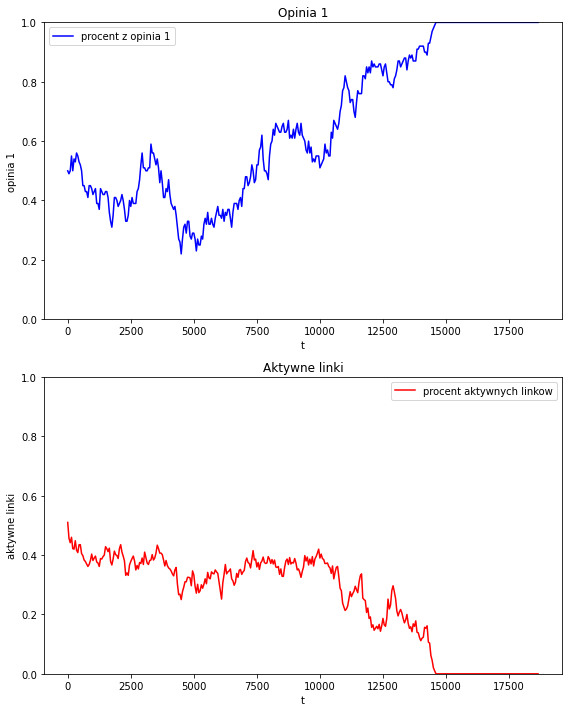

In [311]:
Logic = True
First_time = True
was_before = False 
opinion_1_list = []
opinion_2_list = []
active_link_list = []
plot_time_list = []
time = 0
threshold_time = -70
while Logic:
    edge = rnd.choice(list(network.edges()))
    changed_indx = np.random.randint(2)
    unchanged_indx = 1 - changed_indx
    if rnd.random() <= 1 - p:   #Jeżeli zmieniamy opinie
        #print("Zmieniono stan") #
        network_state[edge[changed_indx]] = network_state[edge[unchanged_indx]]
    elif network_state[edge[changed_indx]] != network_state[edge[unchanged_indx]]:
        #print("Zmieniono krawedz") #
        network.remove_edge(edge[changed_indx], edge[unchanged_indx])   #Usuwamy krawędzie
        diff_opinion_indx = np.where(network_state == network_state[edge[unchanged_indx]])[0]
        neighbours_indx = np.asarray(list(network.neighbors(edge[changed_indx])))    #Sprawdzamy dostępne nowe połączenia
        false_indx = np.concatenate((diff_opinion_indx, neighbours_indx))
        false_indx = np.unique(false_indx).astype(int)
        true_indx = np.delete(np.array(range(N)), false_indx)
        new_indx = rnd.choice(true_indx)    #Losujemy nowy węzeł do połączenia
        network.add_edge(edge[changed_indx], new_indx)
    #print(np.sum(network_state == 0) / len(network_state), "  ", np.sum(network_state == 1) / len(network_state))
    if time % 50 == 0:  
        opinion_1_list.append(np.sum(network_state == 0) / len(network_state))
        opinion_2_list.append(np.sum(network_state == 1) / len(network_state))
        active_link_list.append(get_active_links(network, network_state))
        plot_time_list.append(time)
    #if np.sum(network_state == 0) / len(network_state) >= 0.98 or np.sum(network_state == 0) / len(network_state) <= 0.02:  #Warunek końca
    if len(active_link_list) > 20:
        if np.abs(active_link_list[-1] - active_link_list[-2]) <= 0.001 and np.abs(active_link_list[-1] - active_link_list[-20]) <= 0.001:
            if  was_before == False:
                was_before = True
            else:    
                if First_time == True:
                    threshold_time = int(0.2 * time)
                    First_time = False 
                else:    
                    threshold_time -= 1
                if threshold_time == 0: 
                    Logic = False 
    time += 1    



fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2 rows, 1 column

axs[0].set_ylim(0, 1)
# Plot the first series in the first subplot
axs[0].plot(plot_time_list, opinion_1_list, label='procent z opinia 1', color='blue')
axs[0].set_xlabel('t')
axs[0].set_ylabel('opinia 1')
axs[0].set_title('Opinia 1')
axs[0].legend()

# Plot the second series in the second subplot
axs[1].set_ylim(0,1)
axs[1].plot(plot_time_list, active_link_list, label='procent aktywnych linkow', color='red')
axs[1].set_xlabel('t')
axs[1].set_ylabel('aktywne linki')
axs[1].set_title('Aktywne linki')
axs[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()
        